In [1]:
# Dataset taken from: https://archive.ics.uci.edu/dataset/162/forest+fires
# Author: P. Cortez
# Acessed: 11/12/2024
# License: Open Source
# Change log:
#   - dropped month and day
#   - Moved entire dataset to numpy array
#   - Made Target values binary
"""MLP Model built for predicting a forest fire on a given day"""

'MLP Model built for predicting a forest fire on a given day'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from tensorflow.keras.regularizers import l2

In [3]:
from ucimlrepo import fetch_ucirepo 
forest_fires = fetch_ucirepo(id=162) 
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns  
# data (as pandas dataframes) 
X = forest_fires.data.features 
y = forest_fires.data.targets 
X.drop(['month'], axis=1, inplace=True)
X.drop(['day'], axis=1, inplace=True)  
y = y.to_numpy()
X = X.to_numpy()
y_classifier = np.where(y > 0.0, 1, 0)
y_classifier = y_classifier.flatten()
print(X.shape)
print(y_classifier.shape)

(517, 10)
(517,)


C:\Users\willm\AppData\Local\Temp\ipykernel_356\887886075.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['month'], axis=1, inplace=True)
C:\Users\willm\AppData\Local\Temp\ipykernel_356\887886075.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['day'], axis=1, inplace=True)


In [4]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Fold 1 accuracy: 0.5961538461538461
Fold 1 F1-score: 0.5916128474224427
Fold 1 Recall: 0.5961538461538461
Fold 1 Precision: 0.5983129336787874


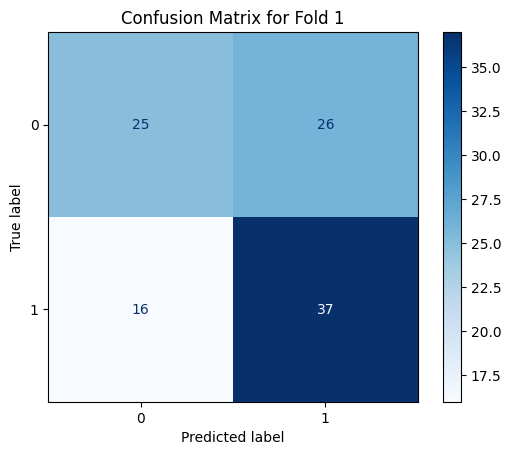

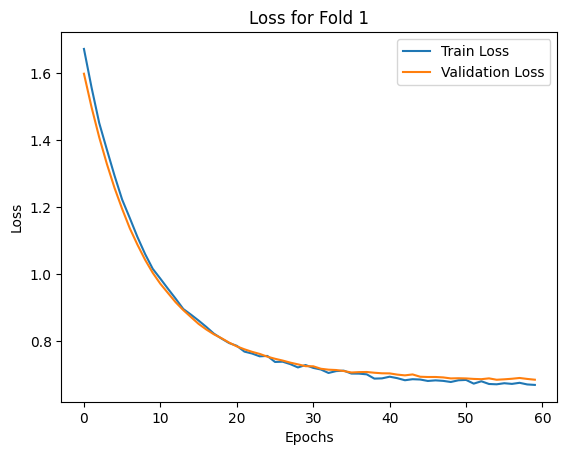

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Fold 2 accuracy: 0.5769230769230769
Fold 2 F1-score: 0.5750343406593406
Fold 2 Recall: 0.5769230769230769
Fold 2 Precision: 0.5770099956540634


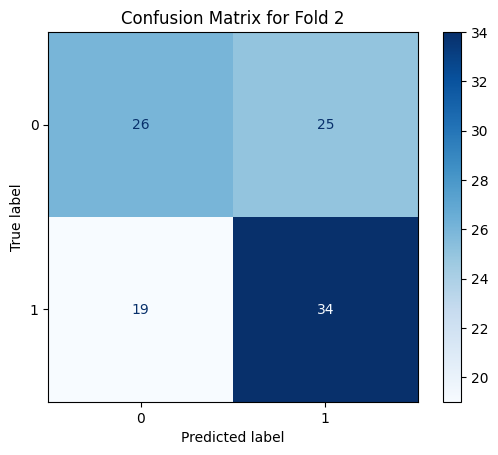

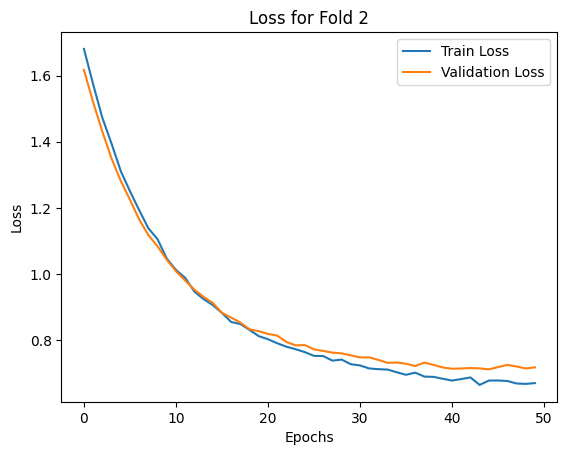

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000189A1B1CEA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Fold 3 accuracy: 0.6116504854368932
Fold 3 F1-score: 0.6131950573698146
Fold 3 Recall: 0.6116504854368932
Fold 3 Precision: 0.6188771251592498


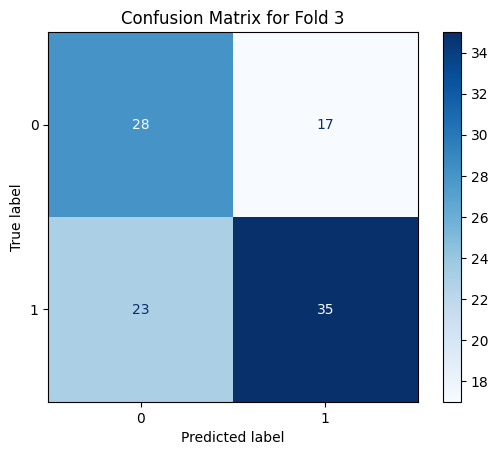

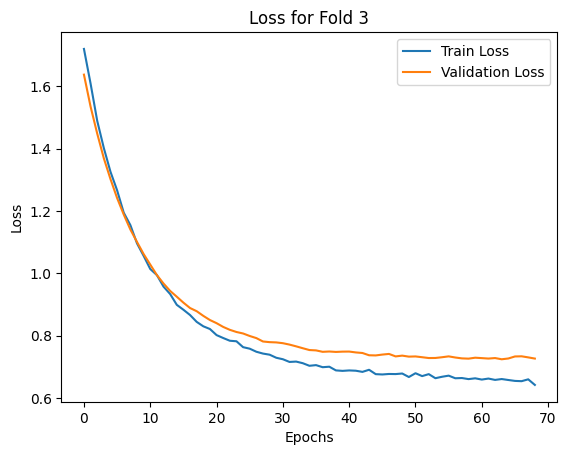

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Fold 4 accuracy: 0.5631067961165048
Fold 4 F1-score: 0.5601237415238437
Fold 4 Recall: 0.5631067961165048
Fold 4 Precision: 0.5658500790246105


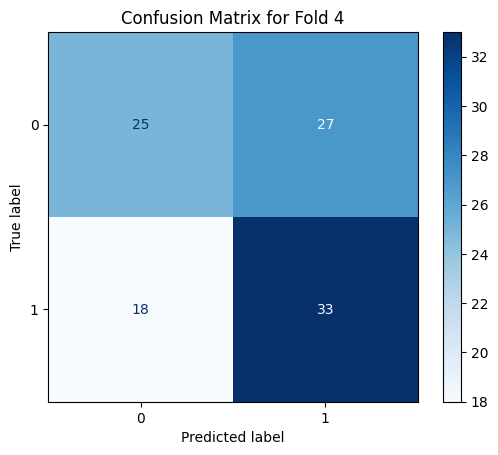

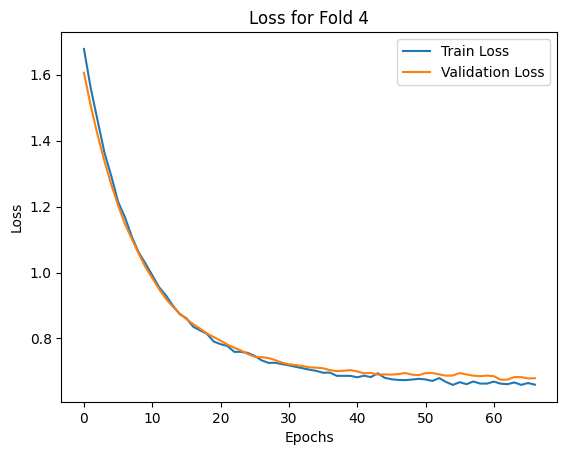

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Fold 5 accuracy: 0.5339805825242718
Fold 5 F1-score: 0.5263039060736058
Fold 5 Recall: 0.5339805825242718
Fold 5 Precision: 0.5287528005974609


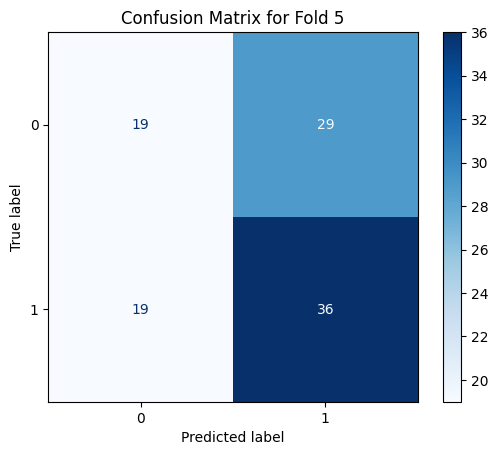

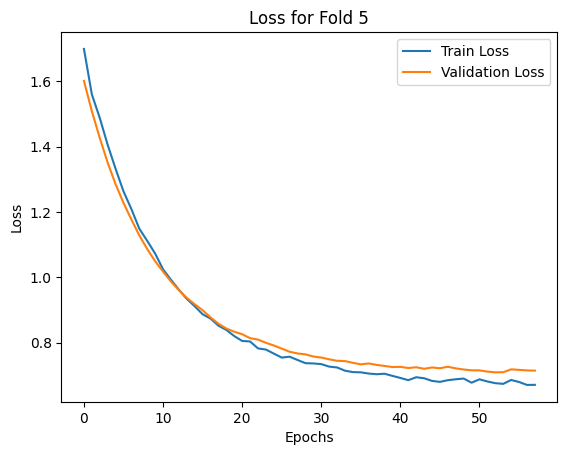

Mean accuracy across folds: 0.5764
Mean F-1 across folds: 0.5733
Mean Recall across folds: 0.5764
Mean Precision across folds: 0.5778


In [5]:
# Lists to store metrics
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []
conf_matrices = []
conf_matrices = []
fold = 1

# Loop over each fold
for train_index, test_index in kf.split(X):
    # define input data for the fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_classifier[train_index], y_classifier[test_index]

    # Split training data for validation
    X_train_small, X_val, y_train_small, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=21)

    # Standardize the features
    scaler = StandardScaler()
    X_train_small_scaled = scaler.fit_transform(X_train_small)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA
    pca = PCA(n_components=0.95)  # Retain 95% variance
    X_train_pca = pca.fit_transform(X_train_small_scaled)
    X_val_pca = pca.transform(X_val_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Build a simple neural network model
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.3),  # Dropout with a 30% rate
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    #define callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model and capture the history
    history = model.fit(X_train_pca, y_train_small, validation_data=(X_val_pca, y_val), epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)

    # Evaluate the model on the test fold
    y_pred = (model.predict(X_test_pca) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    # print scores
    accuracy_scores.append(accuracy)
    print(f"Fold {fold} accuracy: {accuracy}")
    print(f"Fold {fold} F1-score: {f1}")
    print(f"Fold {fold} Recall: {recall}")
    print(f"Fold {fold} Precision: {precision}")

    # append scores for mean
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    precision_scores.append(precision)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices.append(cm)

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for Fold {fold}')
    plt.show()

    # Plot Training and Validation Loss for this fold
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss for Fold {fold}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    fold += 1

# Print overall accuracy
print(f"Mean accuracy across folds: {np.mean(accuracy_scores):.4f}")
print(f"Mean F-1 across folds: {np.mean(f1_scores):.4f}")
print(f"Mean Recall across folds: {np.mean(recall_scores):.4f}")
print(f"Mean Precision across folds: {np.mean(precision_scores):.4f}")